In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import csv
import gmaps 

In [2]:
# Pulling Data from Main CSV file
main_crash_df = pd.read_csv("Resources/1.08_Crash_Data_Report__detail_.csv")
main_crash_df.head(100)
                

,X,Y,OBJECTID,Incidentid,DateTime,Year,StreetName,CrossStreet,Distance,JunctionRelation,...,Unittype_Two,Age_Drv2,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude
0,-111.926299,33.422027,1,2584487,2012/01/10 05:55:00+00,2012,Rural Rd,University Dr,0.000,Not Junction Related,...,Driver,32.0,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.422027,-111.926299
1,-111.909513,33.434986,2,2584442,2012/01/10 14:55:00+00,2012,Mcclintock Dr,State Route 202 Exit 8 A-Ramp,-533.808,Intersection Related Non Interchange,...,Driver,21.0,Female,North,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.434986,-111.909513
2,-111.961282,33.381066,3,2589844,2012/01/10 15:43:00+00,2012,Priest Dr,Darrow Dr,170.016,Not Junction Related,...,Driver,56.0,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.381066,-111.961282
3,-111.892579,33.378452,4,2579417,2012/01/10 16:04:00+00,2012,Baseline Rd,Price Rd,-24.816,Intersection Related Interchange,...,Driver,62.0,Male,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.378452,-111.892579
4,-111.894042,33.392986,5,2584480,2012/01/10 18:23:00+00,2012,Southern Ave,Price Rd,-617.760,Not Junction Related,...,Driver,255.0,Female,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.392986,-111.894042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-111.961521,33.392875,96,2599165,2012/01/13 21:43:00+00,2012,Southern Ave,Priest Dr,-232.848,Unknown,...,Driver,53.0,Female,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.392875,-111.961521
96,-111.898719,33.407492,97,2592203,2012/01/13 22:19:00+00,2012,Broadway Rd,River Dr,-299.904,Not Junction Related,...,Driver,34.0,Male,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.407492,-111.898719
97,-111.960925,33.387004,98,2594507,2012/01/13 22:55:00+00,2012,Priest Dr,US Highway 60 Exit 172 G-Ramp,88.176,Intersection Related Non Interchange,...,Driver,32.0,Female,South,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.387004,-111.960925
98,-111.893719,33.378449,99,2586128,2012/01/13 23:08:00+00,2012,Baseline Rd,Price Rd,-34.848,Intersection Related Non Interchange,...,Driver,44.0,Female,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.378449,-111.893719


In [3]:
#dropping NA values
main_crash_df.dropna(inplace = True)
# new data frame with split value columns
main_crash_split_df = main_crash_df["DateTime"].str.split(" ", n = 1, expand = True)
# making separate Date column from new data frame
main_crash_df["Date"]= main_crash_split_df[0]
# making separate Time column from new data frame
main_crash_df["Time"]= main_crash_split_df[1]
# Dropping old columns
main_crash_df.drop(columns =["DateTime"], inplace = True)
# df display Date and Time now at the end 
main_crash_df.head()

,X,Y,OBJECTID,Incidentid,Year,StreetName,CrossStreet,Distance,JunctionRelation,Totalinjuries,...,Gender_Drv2,Traveldirection_Two,Unitaction_Two,Violation1_Drv2,AlcoholUse_Drv2,DrugUse_Drv2,Latitude,Longitude,Date,Time
1,-111.909513,33.434986,2,2584442,2012,Mcclintock Dr,State Route 202 Exit 8 A-Ramp,-533.808,Intersection Related Non Interchange,3,...,Female,North,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.434986,-111.909513,2012/01/10,14:55:00+00
2,-111.961282,33.381066,3,2589844,2012,Priest Dr,Darrow Dr,170.016,Not Junction Related,0,...,Female,South,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.381066,-111.961282,2012/01/10,15:43:00+00
3,-111.892579,33.378452,4,2579417,2012,Baseline Rd,Price Rd,-24.816,Intersection Related Interchange,0,...,Male,East,Going Straight Ahead,No Improper Action,No Apparent Influence,No Apparent Influence,33.378452,-111.892579,2012/01/10,16:04:00+00
4,-111.894042,33.392986,5,2584480,2012,Southern Ave,Price Rd,-617.760,Not Junction Related,0,...,Female,East,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.392986,-111.894042,2012/01/10,18:23:00+00
5,-111.916532,33.407502,6,2592289,2012,Broadway Rd,Dorsey Ln,352.176,Not Junction Related,0,...,Female,South,Stopped In Trafficway,No Improper Action,No Apparent Influence,No Apparent Influence,33.407502,-111.916532,2012/01/10,18:45:00+00


In [4]:
#drop unnecessary fields and rename columns with a new data frame
clean_data_frame_df = main_crash_df[["Incidentid","Date","Time","Year","StreetName","Totalinjuries","Injuryseverity","Unittype_One","Age_Drv1",
                                    "Gender_Drv1","Violation1_Drv1","Unitaction_One","AlcoholUse_Drv1","DrugUse_Drv1",
                                    "Unittype_Two","Age_Drv2","Gender_Drv2","Violation1_Drv2","Unitaction_Two","AlcoholUse_Drv2","DrugUse_Drv2",
                                    "Latitude","Longitude"]]


clean_data_frame_df = clean_data_frame_df.rename(columns = {"Totalinjuries": "Total Injuries",
                                                           "Incidentid": "Incident ID",
                                                           "Injuryseverity":"Injury Severity",
                                                           "Unittype_One":"Unittype One",
                                                           "StreetName":"Street Name",
                                                           "Age_Drv1":"Age Driver_1",
                                                           "Gender_Drv1":"Gender Driver_1",
                                                           "Violation1_Drv1":"Violation Driver_1",
                                                           "Unitaction_One":"Unitaction One",
                                                            "AlcoholUse_Drv1":"Alcohol Use Driver_1",
                                                           "DrugUse_Drv1":"Drug Use Driver_1",
                                                           "Unittype_Two":"Unittype Two",
                                                           "Age_Drv2":"Age Driver_2",
                                                           "Gender_Drv2":"Gender Driver_2",
                                                           "Violation1_Drv2":"Violation Driver_2",
                                                           "Unitaction_Two":"Unitaction Two",
                                                           "AlcoholUse_Drv2":"Alcohol Use Driver_2",
                                                           "DrugUse_Drv2":"Drug Use Driver_2"
                                                           })

clean_data_frame_df


,Incident ID,Date,Time,Year,Street Name,Total Injuries,Injury Severity,Unittype One,Age Driver_1,Gender Driver_1,...,Drug Use Driver_1,Unittype Two,Age Driver_2,Gender Driver_2,Violation Driver_2,Unitaction Two,Alcohol Use Driver_2,Drug Use Driver_2,Latitude,Longitude
1,2584442,2012/01/10,14:55:00+00,2012,Mcclintock Dr,3,Non Incapacitating Injury,Driver,26.0,Female,...,No Apparent Influence,Driver,21.0,Female,No Improper Action,Stopped In Trafficway,No Apparent Influence,No Apparent Influence,33.434986,-111.909513
2,2589844,2012/01/10,15:43:00+00,2012,Priest Dr,0,No Injury,Driver,19.0,Male,...,No Apparent Influence,Driver,56.0,Female,No Improper Action,Going Straight Ahead,No Apparent Influence,No Apparent Influence,33.381066,-111.961282
3,2579417,2012/01/10,16:04:00+00,2012,Baseline Rd,0,No Injury,Driver,43.0,Male,...,No Apparent Influence,Driver,62.0,Male,No Improper Action,Going Straight Ahead,No Apparent Influence,No Apparent Influence,33.378452,-111.892579
4,2584480,2012/01/10,18:23:00+00,2012,Southern Ave,0,No Injury,Driver,34.0,Male,...,No Apparent Influence,Driver,255.0,Female,No Improper Action,Stopped In Trafficway,No Apparent Influence,No Apparent Influence,33.392986,-111.894042
5,2592289,2012/01/10,18:45:00+00,2012,Broadway Rd,0,No Injury,Driver,43.0,Male,...,No Apparent Influence,Driver,61.0,Female,No Improper Action,Stopped In Trafficway,No Apparent Influence,No Apparent Influence,33.407502,-111.916532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37630,3636698,2019/12/30,04:01:00+00,2019,Elliot Rd,0,No Injury,Driver,34.0,Male,...,No Apparent Influence,Driver,50.0,Female,No Improper Action,Making Left Turn,No Apparent Influence,No Apparent Influence,33.349129,-111.911302
37631,3636699,2019/11/16,22:10:00+00,2019,Apache Blvd,0,No Injury,Driver,19.0,Male,...,No Apparent Influence,Driver,43.0,Female,No Improper Action,Making Left Turn,No Apparent Influence,No Apparent Influence,33.414791,-111.890733
37633,3642788,2019/12/17,19:56:00+00,2019,Kyrene Rd,3,Suspected Serious Injury,Driver,27.0,Male,...,No Apparent Influence,Driver,45.0,Female,No Improper Action,Stopped In Trafficway,No Apparent Influence,No Apparent Influence,33.354821,-111.945840
37634,3642789,2019/12/15,02:41:00+00,2019,Broadway Rd,1,Suspected Serious Injury,Pedestrian,61.0,Male,...,No Apparent Influence,Driver,39.0,Male,No Improper Action,Going Straight Ahead,Alcohol,No Apparent Influence,33.407407,-111.954953


In [5]:
clean_data_frame_df = clean_data_frame_df.loc[clean_data_frame_df["Age Driver_1"] < 100]
clean_data_frame_df = clean_data_frame_df.loc[clean_data_frame_df["Age Driver_2"] < 100]
clean_data_frame_df = clean_data_frame_df.loc[clean_data_frame_df["Year"] >= 2015]

clean_data_frame_df



,Incident ID,Date,Time,Year,Street Name,Total Injuries,Injury Severity,Unittype One,Age Driver_1,Gender Driver_1,...,Drug Use Driver_1,Unittype Two,Age Driver_2,Gender Driver_2,Violation Driver_2,Unitaction Two,Alcohol Use Driver_2,Drug Use Driver_2,Latitude,Longitude
12805,2927875,2015/01/16,00:05:00+00,2015,Mill Ave,0,No Injury,Driver,22.0,Male,...,No Apparent Influence,Driver,62.0,Male,No Improper Action,Going Straight Ahead,No Apparent Influence,No Apparent Influence,33.394238,-111.939624
12806,2941253,2015/01/08,19:50:00+00,2015,Warner Rd,1,Possible Injury,Driver,73.0,Male,...,No Apparent Influence,Driver,24.0,Female,No Improper Action,Going Straight Ahead,No Apparent Influence,No Apparent Influence,33.334359,-111.973082
12810,2917888,2015/01/20,19:25:00+00,2015,Apache Blvd,0,No Injury,Driver,28.0,Male,...,No Apparent Influence,Driver,40.0,Male,No Improper Action,Going Straight Ahead,No Apparent Influence,No Apparent Influence,33.414763,-111.914754
12857,2919274,2015/01/16,00:06:00+00,2015,Southern Ave,0,No Injury,Driver,48.0,Male,...,No Apparent Influence,Driver,49.0,Male,No Improper Action,Stopped In Trafficway,No Apparent Influence,No Apparent Influence,33.392837,-111.943443
12860,2913897,2015/01/02,14:18:00+00,2015,Broadway Rd,0,No Injury,Driver,50.0,Male,...,No Apparent Influence,Driver,53.0,Male,No Improper Action,Going Straight Ahead,No Apparent Influence,No Apparent Influence,33.408451,-111.973597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37629,3636697,2019/12/30,14:44:00+00,2019,McClintock Dr,0,No Injury,Driver,34.0,Male,...,No Apparent Influence,Driver,66.0,Male,No Improper Action,Going Straight Ahead,No Apparent Influence,No Apparent Influence,33.431108,-111.909203
37630,3636698,2019/12/30,04:01:00+00,2019,Elliot Rd,0,No Injury,Driver,34.0,Male,...,No Apparent Influence,Driver,50.0,Female,No Improper Action,Making Left Turn,No Apparent Influence,No Apparent Influence,33.349129,-111.911302
37631,3636699,2019/11/16,22:10:00+00,2019,Apache Blvd,0,No Injury,Driver,19.0,Male,...,No Apparent Influence,Driver,43.0,Female,No Improper Action,Making Left Turn,No Apparent Influence,No Apparent Influence,33.414791,-111.890733
37633,3642788,2019/12/17,19:56:00+00,2019,Kyrene Rd,3,Suspected Serious Injury,Driver,27.0,Male,...,No Apparent Influence,Driver,45.0,Female,No Improper Action,Stopped In Trafficway,No Apparent Influence,No Apparent Influence,33.354821,-111.945840


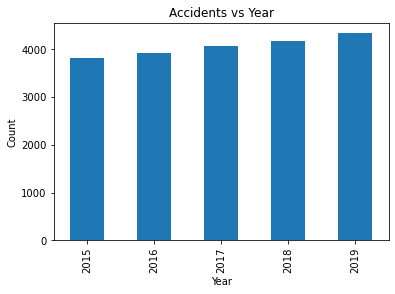

In [6]:
#How many accidents were there in each of the 5 years?
#Here we did a group by on year an count to plot as a bar
#We found that the number of accidents steadily increase year by year
clean_grouped_df = clean_data_frame_df.groupby("Year")
clean_grouped_df_counts = clean_grouped_df["Year"].count()
clean_grouped_df_counts = clean_grouped_df_counts.plot(kind="bar",title = "Accidents vs Year")
clean_grouped_df_counts.set_xlabel("Year")
clean_grouped_df_counts.set_ylabel("Count")

plt.show()

In [7]:
year_counts=clean_data_frame_df["Year"]
year_counts.value_counts().sort_index()

2015    3829
2016    3925
2017    4082
2018    4174
2019    4340
Name: Year, dtype: int64

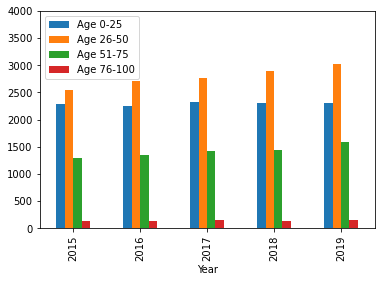

In [8]:
#How old are they? 
#To categorize ages we created new columns with the Age Groups below and said if either Driver was within that group it would add a 1 otherwise a 0 then we grouped by the year and took the sum to plot in a bar graph
#Observation here is that the age group that was the highest does not support our hypothesis of university student demographic 
#instead could point to the working class group likely mid 30's
clean_data_frame_df["Age 0-25"] = np.where((clean_data_frame_df['Age Driver_1'] <= 25) | (clean_data_frame_df['Age Driver_2'] <= 25),1,0)
clean_data_frame_df["Age 26-50"] = np.where((clean_data_frame_df['Age Driver_1'].between(26,50)) | (clean_data_frame_df['Age Driver_2'].between(26,50)),1,0)
clean_data_frame_df["Age 51-75"] = np.where((clean_data_frame_df['Age Driver_1'].between(51,75)) | (clean_data_frame_df['Age Driver_2'].between(51,75)),1,0)
clean_data_frame_df["Age 76-100"] = np.where((clean_data_frame_df['Age Driver_1'].between(76,100)) | (clean_data_frame_df['Age Driver_2'].between(76,100)),1,0)
clean_data_frame_df
age_group_df = clean_data_frame_df.groupby("Year").sum()
age_group_df= age_group_df.reset_index()
age_group_df
age_group_df.plot(kind = "bar",x = "Year",y = ["Age 0-25","Age 26-50","Age 51-75","Age 76-100"],ylim = (0,4000) )

In [9]:
age_group_df

,Year,Incident ID,Total Injuries,Age Driver_1,Age Driver_2,Latitude,Longitude,Age 0-25,Age 26-50,Age 51-75,Age 76-100
0,2015,11401908459,1646,131426.0,143676.0,127875.348740,-428586.749934,2278,2546,1299,127
1,2016,12221484805,1756,136636.0,146628.0,131082.863401,-439336.807929,2255,2704,1352,136
2,2017,13278550802,2061,143573.0,153703.0,136330.070887,-456912.969600,2330,2774,1418,154
3,2018,14174481212,2250,146230.0,157403.0,139402.905810,-467211.496885,2302,2887,1438,127
4,2019,15373220390,2242,154786.0,164400.0,144948.321384,-485787.616522,2304,3029,1590,144


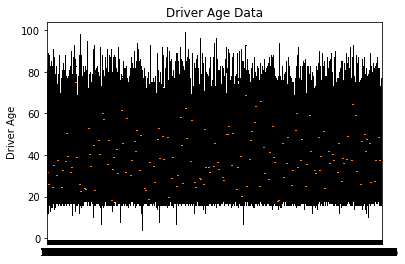

In [10]:
#What is the average age of drivers? Are there any outliers?
#Observation is that the average age is 37 and 35 which does not support our hypothesis of University Student demographic
# We also noticed that there were a lot of outliers 
age_data=clean_data_frame_df[["Age Driver_1","Age Driver_2"]]
fig1, ax1=plt.subplots()
ax1.set_title('Driver Age Data')
ax1.set_ylabel("Driver Age")
ax1.boxplot(age_data)
plt.show()

In [11]:
age_data.describe()

,Age Driver_1,Age Driver_2
count,20350.000000,20350.000000
mean,35.019705,37.631941
std,16.452200,15.488842
min,7.000000,4.000000
25%,22.000000,24.000000
50%,29.000000,34.000000
75%,45.000000,49.000000
max,99.000000,93.000000


In [12]:
#Statistical data
age_data1=clean_data_frame_df["Age Driver_1"]
quartiles = age_data1.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Driver 1 age is: {lowerq}")
print(f"The upper quartile of Driver 1 age is: {upperq}")
print(f"The interquartile range of Driver 1 age is: {iqr}")
print(f"The the median of Driver 1 age is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
age_data2=clean_data_frame_df["Age Driver_2"]
quartiles = age_data2.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Driver 2 age is: {lowerq}")
print(f"The upper quartile of Driver 2 age is: {upperq}")
print(f"The interquartile range of Driver 2 age is: {iqr}")
print(f"The the median of Driver 2 age is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Driver 1 age is: 22.0
The upper quartile of Driver 1 age is: 45.0
The interquartile range of Driver 1 age is: 23.0
The the median of Driver 1 age is: 29.0 
Values below -12.5 could be outliers.
Values above 79.5 could be outliers.
The lower quartile of Driver 2 age is: 24.0
The upper quartile of Driver 2 age is: 49.0
The interquartile range of Driver 2 age is: 25.0
The the median of Driver 2 age is: 34.0 
Values below -13.5 could be outliers.
Values above 86.5 could be outliers.


In [13]:
#Where are they?
#Observations here are that Rural, Baseline and Mcclintock and University had high heat areas leading us to dig into the highest volume accident street names
locations = clean_data_frame_df[["Latitude", "Longitude"]].astype(float)
locations=locations.dropna()
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations,
                                 dissipating=True, max_intensity=100,
                                 point_radius = 5)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

Text(0, 0.5, 'Accident Volume')

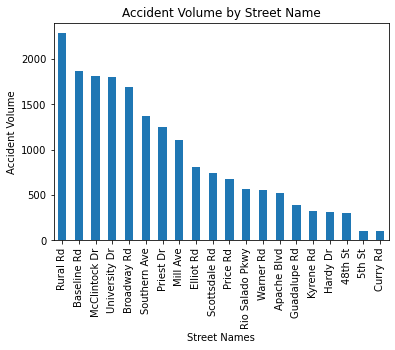

In [14]:
#By doing a value counts and looking at the 20 largest, we were able to support the observations from the heat map 

street_names=clean_data_frame_df["Street Name"].value_counts().nlargest(20)
street_names.plot(kind="bar", title= "Accident Volume by Street Name")
plt.xlabel("Street Names")
plt.ylabel("Accident Volume")

In [15]:
street_names

Rural Rd           2286
Baseline Rd        1865
McClintock Dr      1819
University Dr      1799
Broadway Rd        1691
Southern Ave       1372
Priest Dr          1252
Mill Ave           1104
Elliot Rd           813
Scottsdale Rd       738
Price Rd            675
Rio Salado Pkwy     570
Warner Rd           551
Apache Blvd         522
Guadalupe Rd        385
Kyrene Rd           319
Hardy Dr            308
48th St             296
5th St              102
Curry Rd            101
Name: Street Name, dtype: int64

Text(0, 0.5, 'Sum of Accidents')

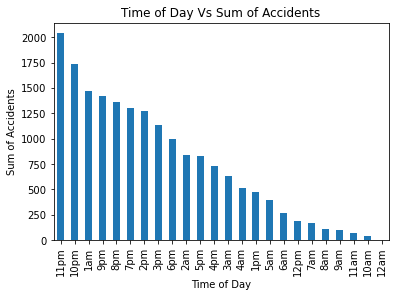

In [16]:
#What Time?
#We used used a for loop to convert the time format to just the hour then used binning to plot using a bar graph 
#Observation is that the most common hours were late night which we think does support our hypothesis of university student demographic

dates= pd.to_datetime(clean_data_frame_df["Time"])
binned_time=[dates.dt.hour for dt in dates][0]
binned_time_df=binned_time.reset_index()
binned_time.value_counts()
bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
labels=["1am","2am","3am","4am","5am","6am","7am","8am","9am","10am","11am","12pm","1pm","2pm","3pm","4pm","5pm","6pm","7pm","8pm","9pm","10pm","11pm","12am"]
binned=pd.cut(binned_time_df["Time"], bins, labels=labels)

x = binned.value_counts()
x.plot(kind = "bar", title="Time of Day Vs Sum of Accidents")
plt.xlabel("Time of Day")
plt.ylabel("Sum of Accidents")


Text(0, 0.5, 'Total Number of Accidents')

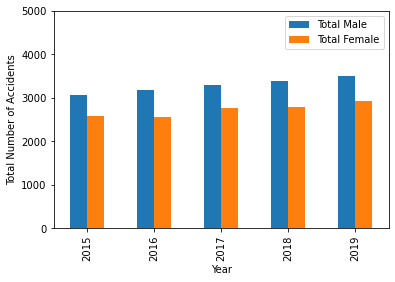

In [17]:
#Mohamed talk to
# observation was that values increased year by year 
clean_data_frame_df["Total Male"] = np.where((clean_data_frame_df['Gender Driver_1'] == "Male") | (clean_data_frame_df['Gender Driver_2'] == "Male"),1,0)
clean_data_frame_df["Total Female"] = np.where((clean_data_frame_df['Gender Driver_1'] == "Female") | (clean_data_frame_df['Gender Driver_2'] == "Female"),1,0)
total_accidents_bygender_df = clean_data_frame_df.groupby("Year").sum()
total_accidents_bygender_df= total_accidents_bygender_df.reset_index()
total_accidents_bygender_df

total_accidents_bygender_df.plot(kind = "bar",x = "Year",y = ["Total Male","Total Female"],ylim = (0,5000) )
plt.title = "Accident Per Year Per Gender"
plt.ylabel("Total Number of Accidents")


In [18]:
#Observation is that the % values are close, likely that Gender didn't play a big factor 

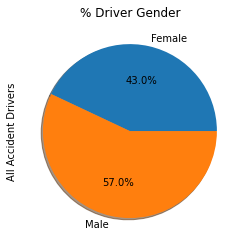

In [19]:
driver1_gender_groupby=clean_data_frame_df.groupby("Gender Driver_1")
driver2_gender_groupby=clean_data_frame_df.groupby("Gender Driver_2")
#combined
gendercounts= driver1_gender_groupby["Gender Driver_1"].count()+driver2_gender_groupby["Gender Driver_2"].count()
gendercounts.plot(kind="pie",title="% Driver Gender",shadow = True,autopct='%1.1f%%')
plt.ylabel("All Accident Drivers")
plt.show()


In [20]:
# Groupby Injury severity then took the sum and created a new data frame with the values for Total Injury within each level
# we also incorporated our Total Gender Counts from previous analysis 
# Observations generally the Male and Female counts were close and didn't indicate gender was a predictor in injury severity

severity_grouped_df = clean_data_frame_df.groupby("Injury Severity").sum()
severity_grouped_df.head()

severity_df = pd.DataFrame({'Injury Severity': ['Fatal', 'Incapacitating Injury', 'No Injury', 'Non Incapacitating Injury', 'Possible Injury', 'Suspected Minor Injury', 'Suspected Serious Injury']})
accident_df = pd.DataFrame({'Total Injuries': [31, 418, 0, 4083, 4021, 1297, 105] })
male_accident_df = pd.DataFrame ({'Total Males':[45, 204, 11116, 2064, 2321, 646, 60 ]})
female_accident_df = pd.DataFrame({'Total Females': [22, 147, 9064, 1679, 2106, 556, 34]})
accident_severity_df = pd.DataFrame({'Injury Severity': ['Fatal', 'Incapacitating Injury', 'No Injury', 'Non Incapacitating Injury', 'Possible Injury', 'Suspected Minor Injury', 'Suspected Serious Injury'],
                        'Total Injuries': [31, 418, 0, 4083, 4021, 1297, 105],
                        'Total Males':[45, 204, 11116, 2064, 2321, 646, 60],
                        'Total Females': [22, 147, 9064, 1679, 2106, 556, 34]
                       })
print("From Original data frame: severity_grouped_df")
#accident_severity_df

From Original data frame: severity_grouped_df


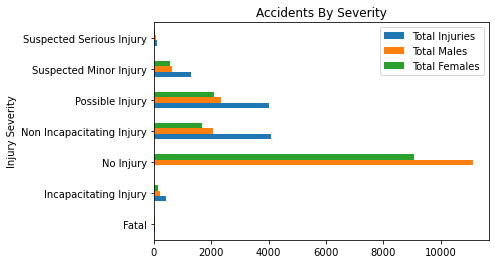

In [21]:
#Number of Accidents By Severity, Total Injuries and Gender
accident_severity_df.plot.barh(y=['Total Injuries', 'Total Males', 'Total Females'], x='Injury Severity',
                             title= "Accidents By Severity")

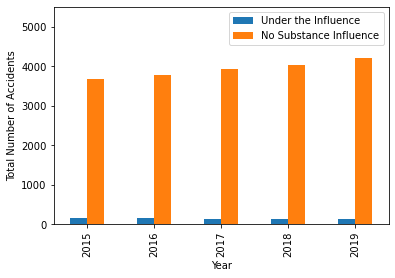

In [22]:
# To look at accidents where either driver was under the influence of drugs or alcohol we used a counted similar to how we did with Gender and Age previously then put into bar graph 
# Observation is that No substance influence was much higher than Under the influence which does not support our initial hypothesis or previous time of day plot

clean_data_frame_df["Total Alcohol"] = np.where((clean_data_frame_df['Alcohol Use Driver_1'] == "Alcohol") | (clean_data_frame_df['Alcohol Use Driver_2'] == "Alcohol"),1,0)
clean_data_frame_df["Total Drugs"] = np.where((clean_data_frame_df['Drug Use Driver_1'] == "Drugs") | (clean_data_frame_df['Drug Use Driver_2'] == "Drugs"),1,0)
clean_data_frame_df["Under the Influence"] = np.where((clean_data_frame_df['Total Alcohol'] == 1) | (clean_data_frame_df['Total Drugs'] == 1),1,0)
clean_data_frame_df["No Substance Influence"] = np.where((clean_data_frame_df['Total Alcohol'] == 0) & (clean_data_frame_df['Total Drugs'] == 0),1,0) 


total_accidents_alcohol_drugs_use_df = clean_data_frame_df.groupby("Year").sum()
total_accidents_alcohol_drugs_use_df= total_accidents_alcohol_drugs_use_df.reset_index()
total_accidents_alcohol_drugs_use_df


total_accidents_alcohol_drugs_use_df.plot(kind = "bar",x = "Year",y = ["Under the Influence","No Substance Influence"],ylim = (0,5500) )
plt.title = "Accident Per Year ( Substance Use )"
plt.ylabel("Total Number of Accidents")
plt.show()
total_accidents_alcohol_drugs_use_df

test_df = clean_data_frame_df[["Alcohol Use Driver_1","Drug Use Driver_1","Under the Influence","Alcohol Use Driver_2","Drug Use Driver_2","No Substance Influence"]]
test_df= test_df.reset_index()
test_df.to_csv("Resources/test3.csv")